# Walmart Analysis Project

Importation of Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from functools import reduce

## 1. Read Dataset and Display Columns

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 2. Basic Statistics of Data 

In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
cols = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

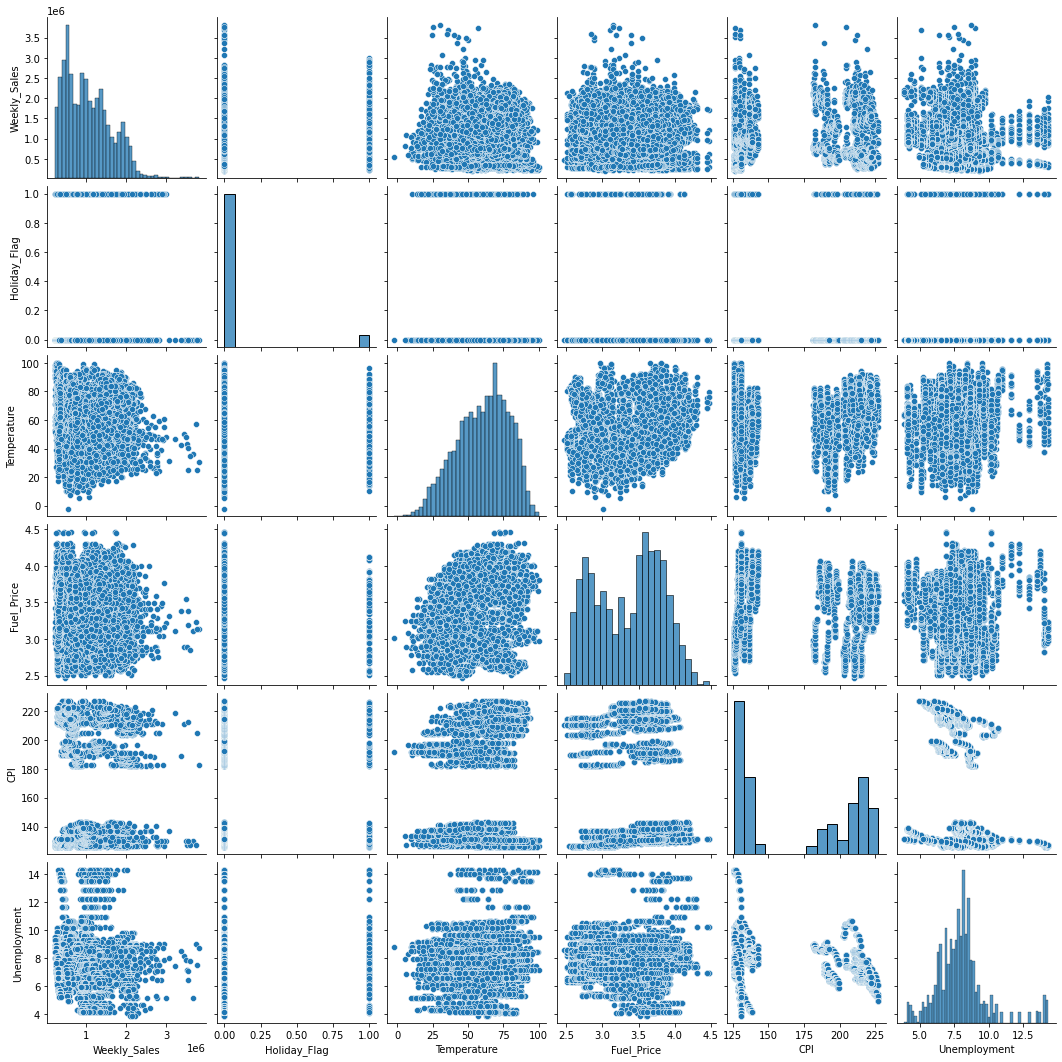

In [9]:
# Creating a pairplot to analyze any possible correlations
sns.pairplot(df[cols])

## Observations From Part 2 

There are no correlations between any of the variables as indicated by the straight lines in the scatter plots shown above. Therefore, it would not be smart to create a machine learning model to try and predict weekly sales. 

## Analysis Tasks

    1. Which store has the most/least sales?
    2. Which store has the most/least standard deviation?
    3. Which store has the best/worst quarterly growth rate?
    4. Determine the impacts of various holidays on the sales
    5. Quarterly, Monthly, Semester View of Sales

In [10]:
# Which store has the most sales

df.loc[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [11]:
# Which store has the least sales

df.loc[df['Weekly_Sales'] == df['Weekly_Sales'].min()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,03-12-2010,209986.25,0,52.82,3.041,126.731333,9.265


### Observations from Analysis Task 1

Store 14 recorded the most sales in a week in 2010. This might be becauase it was the week before Christmas and consumers were buying a lot of presents for their loved ones. Almost $4 million dollars were recorded in sales for that week in Store 14. 

Contrarily, Store 33 recorded the least amount of sales in a a week in 2010. This unwanted achievement occured in the first week of December 2010.  

### Finding Standard Deviation For Each Store 

In [12]:
# Grouping by store and finding the standard deviation 
# and mean of each store and storing it in a dataframe
std = pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales' : ['std', 'mean']}))

# Resetting the index
std = std.reset_index()

# Creating a column called 'std' for each store 
std['std'] = (std[('Weekly_Sales', 'std')] / std[('Weekly_Sales', 'mean')]) * 100

In [13]:
# Highest Standard Deviation 

std.loc[std[('Weekly_Sales', 'std')] == std[('Weekly_Sales', 'std')].max()]

Store   Weekly_Sales                      std
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

In [14]:
# Lowest Standard Deviation

std.loc[std[('Weekly_Sales', 'std')] == std[('Weekly_Sales', 'std')].min()]

Store Weekly_Sales                      std
                  std           mean          
36    37  21837.46119  518900.281958  4.208412

### Observations From Analysis Task #2 

Store 14 has the highest standard deviation. The sales in store 14 vary a lot, and there is no concrete way to determine if the store will have a successful day or not. Contrarily, Store 37 has the lowest standard deviation. The sales in store 37 dont vary a lot. It would be easy to predict the future sales of store 37 compared to predicting future sales of store 14

## Analyzing Quarterly Growth Rates 

In [15]:
# Converting the data type of date column to dateTime
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Defining the start and end of each quarter for the year 2011
Q1_Start_2011 = pd.Timestamp(date(2011, 1, 1))
Q1_End_2011 = pd.Timestamp(date(2011, 3, 31))

Q2_Start_2011 = pd.Timestamp(date(2011, 4, 1))
Q2_End_2011 = pd.Timestamp(date(2011, 6, 30))

Q3_Start_2011 = pd.Timestamp(date(2011, 7, 1))
Q3_End_2011 = pd.Timestamp(date(2011, 9, 30))

Q4_Start_2011 = pd.Timestamp(date(2011, 10, 1))
Q4_End_2011 = pd.Timestamp(date(2011, 12, 31))

In [17]:
# Collecting Data of Q1, Q2, Q3, Q4 from the original dataset
Q1_Data = df[(df['Date'] > Q1_Start_2011) & (df['Date'] < Q1_End_2011)]

Q2_Data = df[(df['Date'] > Q2_Start_2011) & (df['Date'] < Q2_End_2011)]

Q3_Data = df[(df['Date'] > Q3_Start_2011) & (df['Date'] < Q3_End_2011)]

Q4_Data = df[(df['Date'] > Q4_Start_2011) & (df['Date'] < Q4_End_2011)]

In [18]:
# Finding the sum weekly sales of each store in Q1, Q2, Q3, Q4

Q1 = pd.DataFrame(Q1_Data.groupby('Store')['Weekly_Sales'].sum())
Q1.reset_index(inplace = True)
Q1.rename(columns = {'Weekly_Sales' : 'Q1_Weekly_Sales'}, inplace = True)

Q2 = pd.DataFrame(Q2_Data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace = True)
Q2.rename(columns = {'Weekly_Sales' : 'Q2_Weekly_Sales'}, inplace = True)

Q3 = pd.DataFrame(Q3_Data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace = True)
Q3.rename(columns = {'Weekly_Sales' : 'Q3_Weekly_Sales'}, inplace = True)

Q4 = pd.DataFrame(Q4_Data.groupby('Store')['Weekly_Sales'].sum())
Q4.reset_index(inplace = True)
Q4.rename(columns = {'Weekly_Sales' : 'Q4_Weekly_Sales'}, inplace = True)

In [19]:
# Merging the weekly sales from each quarter into a single dataframe

Quarters = [Q1, Q2, Q3, Q4]

Quarterly_Growth = reduce(lambda left, right: pd.merge(left, right, on = ['Store'], how = 'outer'), Quarters)

In [20]:
Quarterly_Growth

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales
0,1,18049876.61,20243682.63,18214254.08,21574811.40
1,2,22138308.04,24142687.77,21812488.56,27105951.82
2,3,4686117.16,5192794.22,4595100.14,5596145.78
3,4,24297943.92,26940934.55,25313645.68,30747806.28
4,5,3735696.22,4091950.40,3650261.23,4414249.51
5,6,18002525.97,19740144.35,18251366.70,21876732.33
6,7,6839763.48,6623769.46,7409644.87,8639418.51
7,8,10692911.25,11738976.37,10613983.95,12784799.99
8,9,6315266.13,7103406.90,6376792.91,7890954.89
9,10,22077591.59,23925054.08,21773853.35,27798378.51


In [21]:
# Calculating the quarterly growth rate for Q1 - Q2, Q2 - Q3, Q3 - Q4

Quarterly_Growth['Q1_to_Q2_growth'] = round((
    Quarterly_Growth['Q2_Weekly_Sales'] - Quarterly_Growth['Q1_Weekly_Sales']
) / Quarterly_Growth['Q1_Weekly_Sales'], 3) * 100

Quarterly_Growth['Q2_to_Q3_growth'] = round((
    Quarterly_Growth['Q3_Weekly_Sales'] - Quarterly_Growth['Q2_Weekly_Sales']
) / Quarterly_Growth['Q2_Weekly_Sales'], 3) * 100

Quarterly_Growth['Q3_to_Q4_growth'] = round((
    Quarterly_Growth['Q4_Weekly_Sales'] - Quarterly_Growth['Q3_Weekly_Sales']
) / Quarterly_Growth['Q3_Weekly_Sales'], 3) * 100

In [22]:
Quarterly_Growth

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
0,1,18049876.61,20243682.63,18214254.08,21574811.40,12.2,-10.0,18.5
1,2,22138308.04,24142687.77,21812488.56,27105951.82,9.1,-9.7,24.3
2,3,4686117.16,5192794.22,4595100.14,5596145.78,10.8,-11.5,21.8
3,4,24297943.92,26940934.55,25313645.68,30747806.28,10.9,-6.0,21.5
4,5,3735696.22,4091950.40,3650261.23,4414249.51,9.5,-10.8,20.9
5,6,18002525.97,19740144.35,18251366.70,21876732.33,9.7,-7.5,19.9
6,7,6839763.48,6623769.46,7409644.87,8639418.51,-3.2,11.9,16.6
7,8,10692911.25,11738976.37,10613983.95,12784799.99,9.8,-9.6,20.5
8,9,6315266.13,7103406.90,6376792.91,7890954.89,12.5,-10.2,23.7
9,10,22077591.59,23925054.08,21773853.35,27798378.51,8.4,-9.0,27.7


### Which store has the highest/lowest growth rate in each quarter in 2011

In [30]:
# Highest in Q1 to Q2

Quarterly_Growth.loc[Quarterly_Growth['Q1_to_Q2_growth'] == Quarterly_Growth['Q1_to_Q2_growth'].max()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
17,18,11441463.43,13511478.44,12106807.88,15376681.98,18.1,-10.4,27.0


In [31]:
# Lowest in Q1 to Q2

Quarterly_Growth.loc[Quarterly_Growth['Q1_to_Q2_growth'] == Quarterly_Growth['Q1_to_Q2_growth'].min()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
6,7,6839763.48,6623769.46,7409644.87,8639418.51,-3.2,11.9,16.6


In [32]:
# Highest in Q2 to Q3

Quarterly_Growth.loc[Quarterly_Growth['Q2_to_Q3_growth'] == Quarterly_Growth['Q2_to_Q3_growth'].max()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
6,7,6839763.48,6623769.46,7409644.87,8639418.51,-3.2,11.9,16.6


In [27]:
# Lowest in Q2 to Q3

Quarterly_Growth.loc[Quarterly_Growth['Q2_to_Q3_growth'] == Quarterly_Growth['Q2_to_Q3_growth'].min()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
27,28,15516588.64,17706951.56,15321386.46,18087447.69,14.1,-13.5,18.1


In [28]:
# Highest in Q3 to Q4

Quarterly_Growth.loc[Quarterly_Growth['Q3_to_Q4_growth'] == Quarterly_Growth['Q3_to_Q4_growth'].max()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
34,35,9559778.93,10493951.37,9870887.77,12763393.86,9.8,-5.9,29.3


In [29]:
# Lowest in Q3 to Q4

Quarterly_Growth.loc[Quarterly_Growth['Q3_to_Q4_growth'] == Quarterly_Growth['Q3_to_Q4_growth'].min()]

,Store,Q1_Weekly_Sales,Q2_Weekly_Sales,Q3_Weekly_Sales,Q4_Weekly_Sales,Q1_to_Q2_growth,Q2_to_Q3_growth,Q3_to_Q4_growth
35,36,4568735.24,4912988.32,4302638.11,4488686.86,7.5,-12.4,4.3


In the year 2011:
    
    Store 18 had the highest growth rate in the first quarter. (18.1)
    Store 7 had the lowest growth rate in the first quarter. (-3.2)
    Store 7 had the higest growth rate in the second quarter. (11.9)
    Store 28 had the lowest growth rate in the second quarter. (-13.5)
    Store 35 had the highest growth rate in the third quarter. (29.3)
    Store 36 has the lowest growth rate in the third quarter. (4.3)

Text(0, 0.5, 'Growth Rate in %')

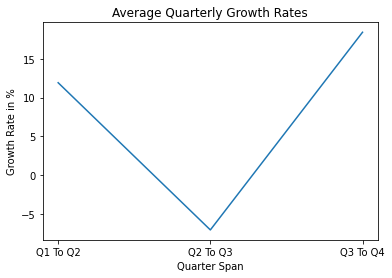

In [33]:
# Creating a line plot to visualize the average growth rate for all stores

sns.lineplot(x = ['Q1 To Q2', 'Q2 To Q3', 'Q3 To Q4'], 
            y = [round(Quarterly_Growth['Q1_to_Q2_growth'].mean(), 2),
                round(Quarterly_Growth['Q2_to_Q3_growth'].mean(), 2), 
                round(Quarterly_Growth['Q3_to_Q4_growth'].mean(), 2)]);
plt.title("Average Quarterly Growth Rates")
plt.xlabel("Quarter Span")
plt.ylabel("Growth Rate in %")

## Impact of Holidays on Sales 

In [34]:
# Finding the mean sales on holiday and non-holidays

df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [35]:
# Marking the days that are holidays in this dataset (Christmas, Thanksgiving, Labour Day, Super Bowl, July 4, )

Christmas1 = pd.Timestamp(date(2010, 12, 31))
Christmas2 = pd.Timestamp(date(2011, 12, 30))
Christmas3 = pd.Timestamp(date(2012, 12, 28))
Christmas4 = pd.Timestamp(date(2013, 12, 27))

Thanksgiving1 = pd.Timestamp(date(2010, 11, 26))
Thanksgiving2 = pd.Timestamp(date(2011, 11, 25))
Thanksgiving3 = pd.Timestamp(date(2012, 11, 23))
Thanksgiving4 = pd.Timestamp(date(2013, 11, 29))

LabourDay1 = pd.Timestamp(date(2010, 2, 10))
LabourDay2 = pd.Timestamp(date(2011, 2, 9))
LabourDay3 = pd.Timestamp(date(2012, 2, 7))
LabourDay4 = pd.Timestamp(date(2013, 2, 6))

SuperBowl1 = pd.Timestamp(date(2010, 9, 12))
SuperBowl2 = pd.Timestamp(date(2011, 9, 11))
SuperBowl3 = pd.Timestamp(date(2012, 9, 10))
SuperBowl4 = pd.Timestamp(date(2013, 9, 8))

Independence1 = pd.Timestamp(date(2010, 6, 10))
Independence2 = pd.Timestamp(date(2011, 6, 9))
Independence3 = pd.Timestamp(date(2012, 6, 7))
Independence4 = pd.Timestamp(date(2013, 6, 6))

In [36]:
# Calculating average sales that occur on the 4 major holidays

# Christmas
Christmas = df[(df['Date'] == Christmas1) | (df['Date'] == Christmas2) | (df['Date'] == Christmas3) | (df['Date'] == Christmas4)]
print("Christmas: ", round(Christmas['Weekly_Sales'].mean(), 2))

# Thanksgiving
Thanksgiving = df[(df['Date'] == Thanksgiving1) | (df['Date'] == Thanksgiving2) | (df['Date'] == Thanksgiving3) | (df['Date'] == Thanksgiving4)]
print("Thanksgiving: ", round(Thanksgiving['Weekly_Sales'].mean(), 2))

# LabourDay
LabourDay = df[(df['Date'] == LabourDay1) | (df['Date'] == LabourDay2) | (df['Date'] == LabourDay3) | (df['Date'] == LabourDay4)]
print("LabourDay: ", round(LabourDay['Weekly_Sales'].mean(), 2))

# SuperBowl
SuperBowl = df[(df['Date'] == SuperBowl1) | (df['Date'] == SuperBowl2) | (df['Date'] == SuperBowl3) | (df['Date'] == SuperBowl4)]
print("SuperBowl: ", round(SuperBowl['Weekly_Sales'].mean(), 2))

# Independence Day
IndependenceDay = df[(df['Date'] == Independence1) | (df['Date'] == Independence2) | (df['Date'] == Independence3) | (df['Date'] == Independence4)]
print("Independence Day: ", round(IndependenceDay['Weekly_Sales'].mean(), 2))

# Non-holidays
NonHolidays = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print("Non-Holidays: ", round(NonHolidays, 2))

Christmas:  960833.11
Thanksgiving:  1471273.43
LabourDay:  1008369.41
SuperBowl:  nan
Independence Day:  1138956.04
Non-Holidays:  1041256.38


### Observations from Analysis Task #4 

People spend a lot of their moneny on Independence Day and Thanksgiving. This is justified as the average sales that occur on these national holidays is far greater than the sales that occur on a regular day

## Quarterly, Monthly, and Semester View of Sales

Text(0, 0.5, 'Weekly Sales')

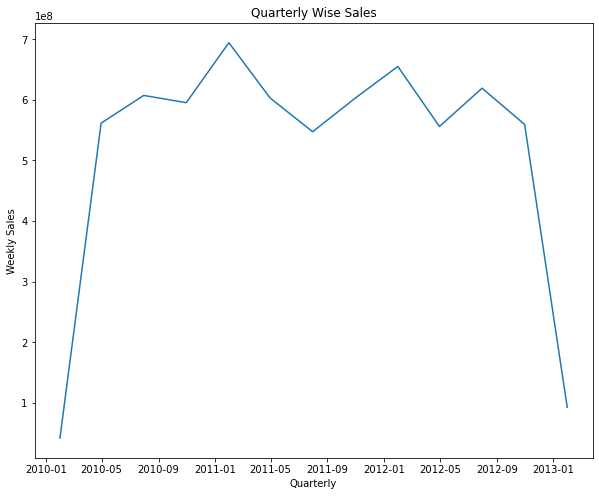

In [37]:
# Quarterly Sales

Quarterly = df.groupby(pd.Grouper(key = 'Date', freq = '3M')).sum()
Quarterly = Quarterly.reset_index()

fig, ax = plt.subplots(figsize = (10, 8))

X = Quarterly['Date']
Y = Quarterly['Weekly_Sales']

plt.plot(X, Y)

plt.title('Quarterly Wise Sales')
plt.xlabel('Quarterly')
plt.ylabel('Weekly Sales')

We can observe from Quarterly Sales Graph that the highest sum of sales is recorded in between Quarter 1 of 2011 and 2012

Text(0, 0.5, 'Weekly_Sales')

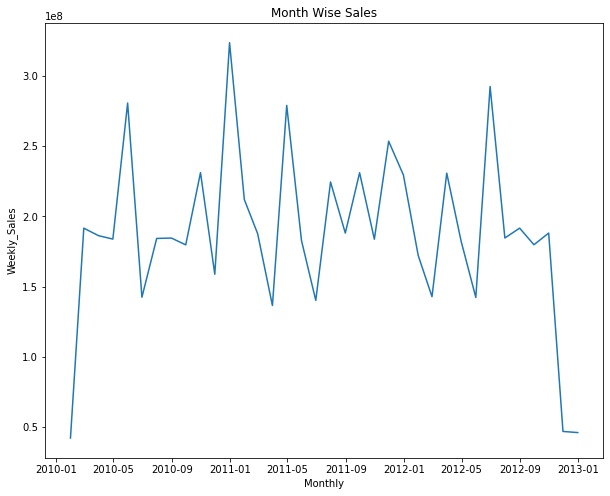

In [38]:
# Monthly Sales

Monthly = df.groupby(pd.Grouper(key = 'Date', freq = '1M')).sum()
Monthly = Monthly.reset_index()

fig, ax = plt.subplots(figsize = (10, 8))

X = Monthly['Date']
Y = Monthly['Weekly_Sales']

plt.plot(X,Y)

plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

We can observe from the Monthly Sales Graph that the highest sum of sales is recorded between January 2011 to March 2011

Text(0, 0.5, 'Weekly_Sales')

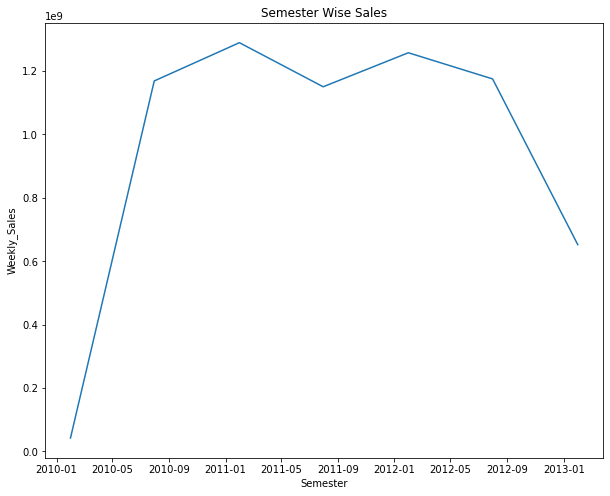

In [39]:
#Semester Sales 

Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()

fig, ax = plt.subplots(figsize=(10,8))

X = Semester['Date']
Y = Semester['Weekly_Sales']

plt.plot(X,Y)

plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

We can observe from the Semester Sales graph that the sales are the greatest in the first semester of 2010. The sales are lowest in the first semester of 2013